In [1]:
import pyneb as pn

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
from astropy import constants

In [3]:
rc_fonts = {
        "text.usetex": True,
        "font.size": 30,
        'mathtext.default': 'regular',
        'axes.titlesize': 33,
        "axes.labelsize": 33,
        "legend.fontsize": 30,
        "xtick.labelsize": 30,
        "ytick.labelsize": 30,
        'figure.titlesize': 33,
        'figure.figsize': (13,11),
        'text.latex.preamble': [r'\usepackage{amsmath,amssymb,bm,physics,lmodern}'],
        "font.family": "serif",
        "font.serif": "computer modern roman",
        }

plt.rcParams.update(rc_fonts)

/home/roberto/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [4]:
print(pn.__version__)

1.1.18


# Find atomic continuum

In [christophe](https://arxiv.org/pdf/2009.10586.pdf) we see that we calculate the emissivity of the continue in

$$\frac{erg}{cm^3 s A}$$

to have this units we need to put $HI_{label}=None$

In [5]:
C = pn.core.continuum.Continuum()
C.get_continuum(tem=1e4, den=1e2, He1_H=0.12, He2_H=0.01, 
               wl =np.linspace(3500,3900,100), HI_label=None)

array([6.66181799e-28, 6.66983184e-28, 6.67776117e-28, 6.68567142e-28,
       6.69358551e-28, 6.70150325e-28, 6.70942447e-28, 6.71734902e-28,
       6.72527671e-28, 6.73320738e-28, 6.74114088e-28, 6.74907702e-28,
       6.75701566e-28, 6.76495663e-28, 6.77289977e-28, 6.78084491e-28,
       6.78879191e-28, 6.79674061e-28, 6.80469085e-28, 6.81264247e-28,
       6.82059532e-28, 6.82854926e-28, 6.83650413e-28, 6.84445977e-28,
       6.85241605e-28, 6.86037282e-28, 6.86832992e-28, 6.87628722e-28,
       6.88424457e-28, 6.89220182e-28, 6.90015884e-28, 6.90811549e-28,
       6.91607162e-28, 6.92402709e-28, 6.93198178e-28, 6.93993554e-28,
       6.94788824e-28, 1.50862996e-28, 1.50602864e-28, 1.50344242e-28,
       1.50087118e-28, 1.49831484e-28, 1.49577330e-28, 1.49324648e-28,
       1.49073427e-28, 1.37667901e-28, 1.37394697e-28, 1.37122954e-28,
       1.36852664e-28, 1.36583816e-28, 1.36316403e-28, 1.36050415e-28,
       1.35785845e-28, 1.35522683e-28, 1.35260922e-28, 1.35000552e-28,
      

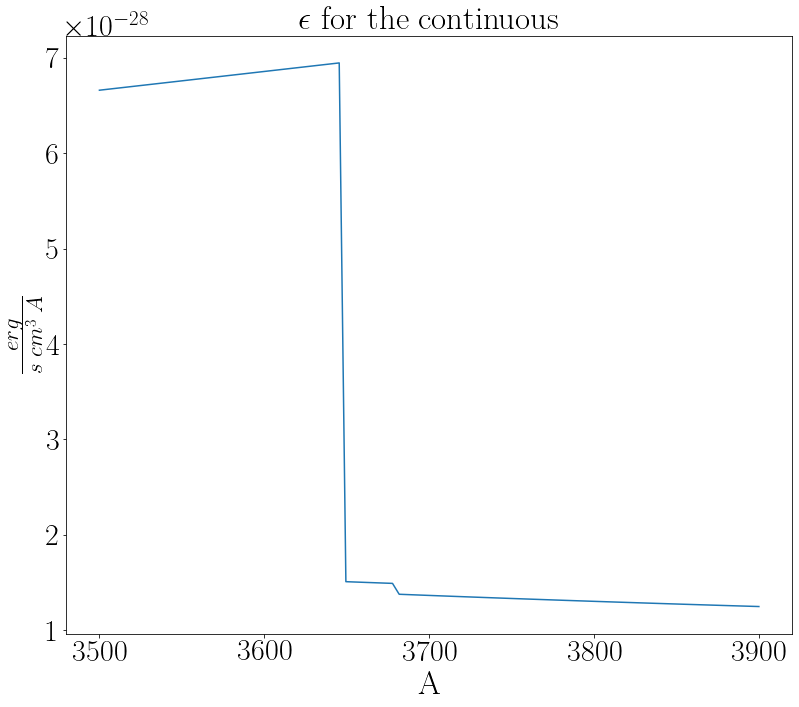

In [7]:
plt.plot(np.linspace(3500,3900,100),C.get_continuum(tem=1e4, den=1e2, He1_H=0.12, He2_H=0.01, 
               wl =np.linspace(3500,3900,100), HI_label=None))
plt.xlabel('A')
plt.ylabel(r'$\frac{erg}{s\;cm^3\;A}$')
plt.title(rf'$\epsilon$ for the continuous')
plt.show()

Now we want to calculate $\epsilon$ of the continumm in some regions of JWST

We see ie in 0.9-18$\mu $m

No handles with labels found to put in legend.


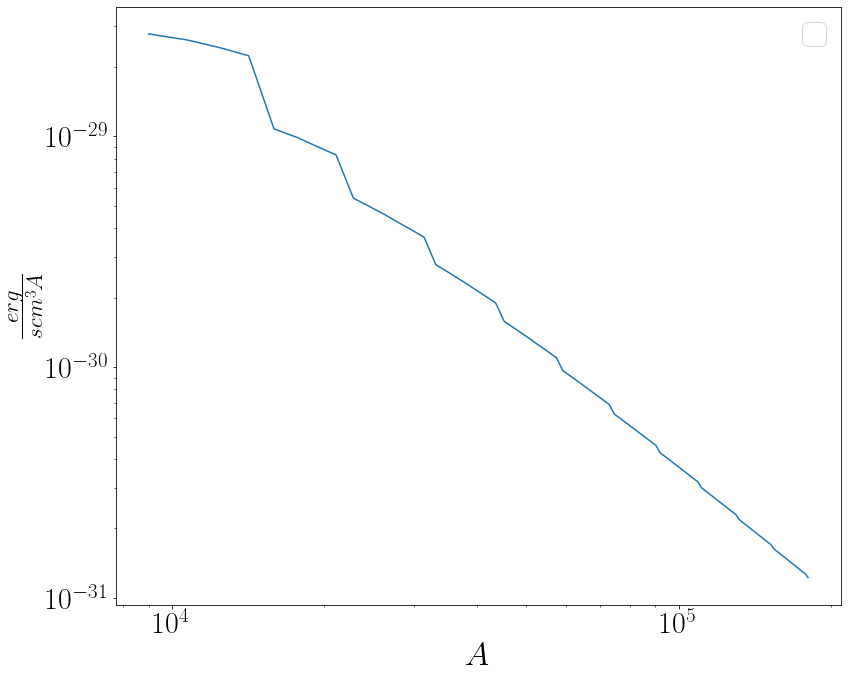

In [8]:
plt.plot(np.linspace(9000,180000,100),C.get_continuum(tem=0.6e4, den=1e3, He1_H=0.12, He2_H=0.01, 
               wl =np.linspace(9000,180000,100), HI_label=None))
plt.yscale('log')
plt.ylabel(r'$\frac{erg}{s cm^3 A}$')
plt.xlabel(r'$A$')
plt.xscale('log')
plt.legend()
plt.show()

We want to compare with our calculate only for the free-free, to do it this we need

* convert $A$ to cm
* convert from $\lambda$ to Hz
* Calculate in superfitial brightness

$$j_\nu=\frac{\lambda^2}{c}j_\lambda$$

In [9]:
'''1 A = 1e-8 cm'''

'''j_nu= (lambda^2/c)J_lambda'''

'''Primero pasamos a cm '''
j_lamb = (C.get_continuum(tem=0.6e4, den=1e3, He1_H=0.12, He2_H=0.01, 
               wl =np.linspace(9000,180000,100), HI_label=None))/(1e-8) 

'''Tiene unidades de erg s^{-1} cm^-3 cm^-1'''

lamb_ = (np.linspace(9000,180000,100))*1e-8 #lamb en cm

c_cgs = ((constants.c).cgs).value

'''Pasamos a Hz'''

'''Tiene unidades de erg s^-1 cm^-3 Hz^-1'''

j_nu = (lamb_**2/c_cgs)*j_lamb

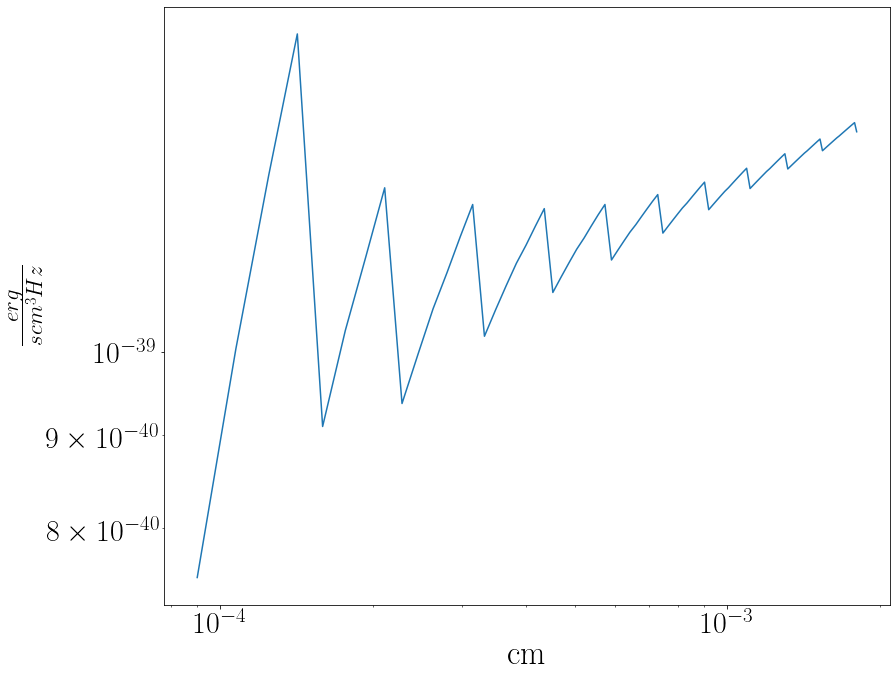

In [10]:
plt.plot(lamb_,j_nu)
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\frac{erg}{s cm^{3} Hz}$')
plt.xlabel('cm')
plt.show()

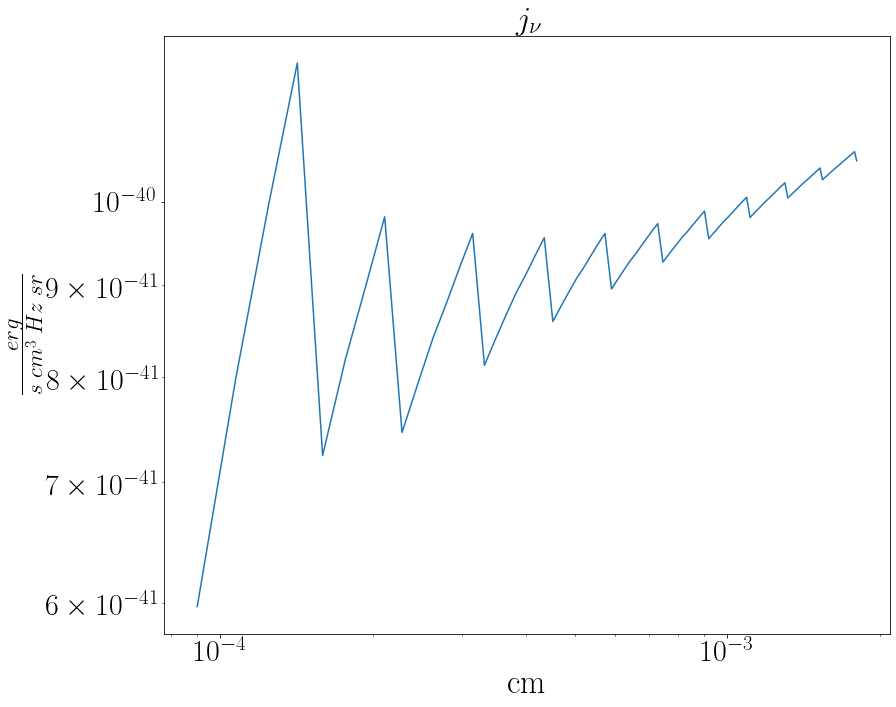

In [12]:
'''Aqui con unidades de erg s^-1 cm^-3 Hz^-1 sr^-1'''
j_nu_sr = j_nu/(4*np.pi)
plt.plot(lamb_,j_nu_sr)
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\frac{erg}{s\; cm^{3}\; Hz\; sr}$')
plt.xlabel('cm')
plt.title(r'$j_\nu$')
plt.show()

Now we use the EM to calculate de intensity with the PyNeb continuous

In [13]:
from astropy.table import QTable

tab = QTable.read("/home/roberto/globule-seminario/m1-67/m1-67-globule-parameters.ecsv")
#tab = QTable.read("../m1-67/m1-67-globule-parameters.ecsv") the ... the direction in our server
df = tab.to_pandas()
D = 5429*u.pc                      # conversation with Jane
v_inf = 710*u.km*(1/u.second)      # Hanmman
M_loss = (2.0E-5)*u.M_sun*(1/u.yr) #Crowther 1999
L = 10**(49.1)*(1/u.second)        # Hanmman
E = (6.61E-27*2.99E10)/(6.563E-5)*(u.erg)
EM = (df['Bshell'])*(0.0137*4*np.pi)/(3.61E5*E)*(u.pc/(u.cm**5))
EM
l = 2*(df['Rshell']*df['Hshell'])**(1/2)*D*4.84814e-6 #factor to converto to cm
l
n = (EM/(l))**(1/2)

/home/roberto/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


For this we considerer

 $$S_\nu=\frac{j_\nu}{n_0^2}EM$$ in our case to have the units of $MJy/sr$ nwe need to multiply the EM to have in units of $cm^{-5}$ again

With $n_0=10^3$ like in the code

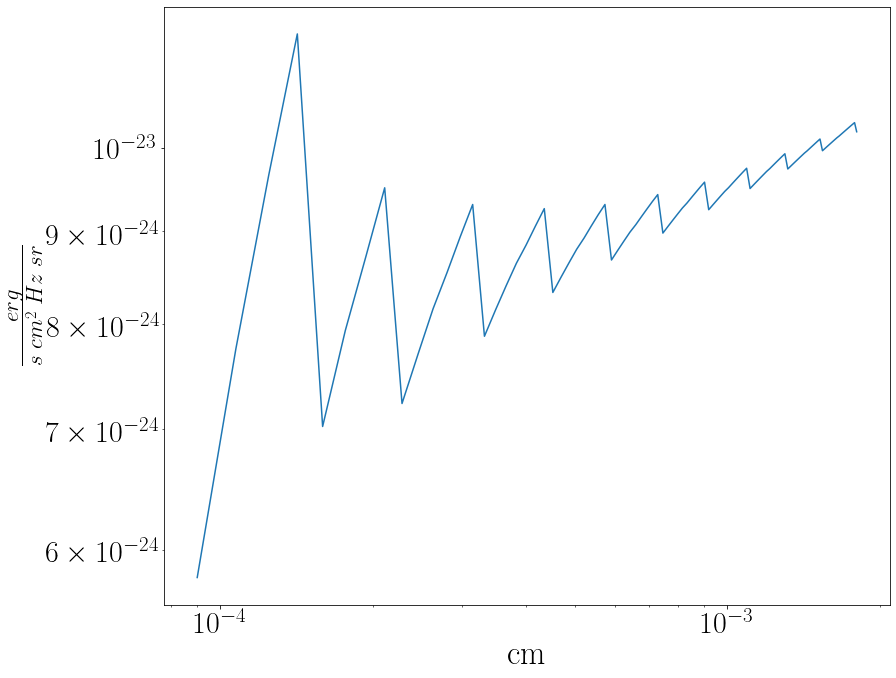

In [14]:
S_nu = j_nu_sr*EM[167]*3.086e18/((1e3)**2)

'''Aqui con unidades de erg s^-1 cm^-2 Hz^-1 sr^-1'''

plt.plot(lamb_,S_nu)
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\frac{erg}{s\; cm^{2}\; Hz\; sr}$')
plt.xlabel('cm')
plt.show()

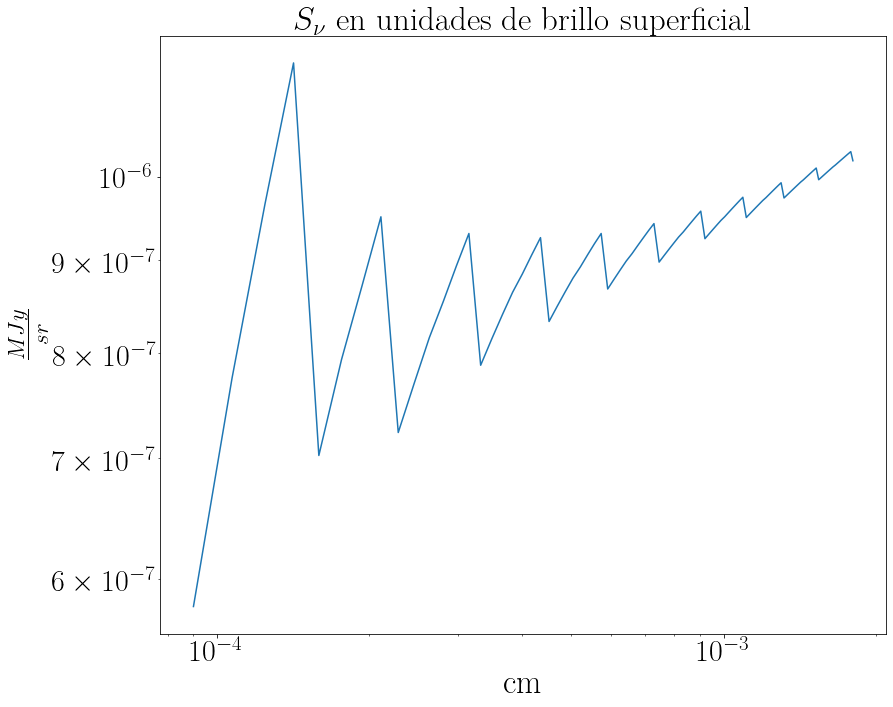

In [15]:
'''Aqui con unidades de MJy sr^-1'''
conv_MJy_sr = 1*u.MJy/(1*u.sr)
S_nu_MJy = (S_nu*u.erg/(u.second*(u.cm**2)*u.Hz*u.sr)).to(conv_MJy_sr)
plt.plot(lamb_,S_nu_MJy)
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\frac{MJy}{sr}$')
plt.xlabel('cm')
plt.title(r'$S_\nu$ en unidades de brillo superficial')
plt.show()